# Why Generative Models?

This notebook is designed to provide motivation and intuition for why generative models exist, by showing how they relate to discriminative models (regressors, classifiers) that you may already be familiar with. We also explore why probabilistic models are a natural way to think about generation, we review standard methods to build generative models, and we end by talking about real-world applications of generative models.

In the way humans think, **discrimination** -- the ability to categorize and classify objects -- is usually very tightly linked to the ability to **generate** -- the ability to imagine or generate new kinds of objects. When you teach a child the digits 0 through 9, they are not only able to tell the different digits apart, but also conjure up images of the digits in their head when told to "think of the digit 7." 

However, on a purely algorithmic level, a machine that is able to discriminate successfully does not necessarily mean that it can also generate well. Consider a simple example of a machine that is designed to discriminate between the handwritten images of the digits $0$ and $1$. An algorithm may do quite well on this task simply by looking at whether the center pixel of the image is included in the handwritten stroke -- if it is, the algorithm predicts $1$; otherwise, it predicts $0$. Such a simple algorithm, as shown below, is quite accurate at discrimination: it gets $99\%$ accuracy discriminating between these two digits on the MNIST dataset. However, it hardly knows enough to generate new images of $0$ and $1$!

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

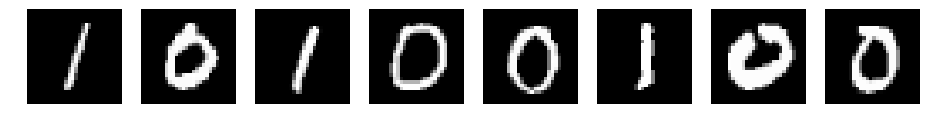

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Load the MNIST dataset.
idx = np.where(y_test<2); x_test = x_test[idx]; y_test=y_test[idx]  # Get only digits 0 or 1.

# Show some examples.
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(8):
    ax[i].imshow(x_test[i], cmap='gray')
    ax[i].set_axis_off()

In [4]:
# Predict 0 or 1 based on the center digit
middle_pixel = 14  # the middle of a 28-by-28 array
brightness_threshold = 128  # if array value is greater than this threshold, that means the pixel is filled in by the stroke
y_pred = [1 if img[middle_pixel, middle_pixel] > brightness_threshold else 0 for img in x_test] 

# Evaluate accuracy, as a percent
acc = 100*np.sum(y_pred == y_test)/len(y_test)
print('The test accuracy is:', round(acc, 2), 'percent!')

The test accuracy is: 98.96 percent!


If discriminative models map samples to classes, with a generative model, we'd like to go into the reverse direction: given a class, we'd like to be able to generate new images (illustrated below). In fact, this definition is only a special case of a generative model, known as the *conditional generative model*. More generally, or perhaps as a first step, it would nice to have a model that can produce a sample that looks like it could have been found in our original dataset, *regardless of class*.

<img src="images/1_1_discriminative_generative.png">

## Probabilistic Models 

In the way we have described generative models above, you'll notice something interesting: a generative model must be able to generate *more than one output*! That's kind of strange -- a discriminative model only needs to output a single class for a given image, but for generative models to be interesting, a single output probably won't do: it needs to generate many different samples of the digit $7$ for example. 

This is interesting, because that suggests we can't represent a generative model with a single deterministic function. If you think back to your middle-school algebra class, you'll remember a function can only have a single output for a given input. But we need some way to represent of our generative model to produce many different outputs. The standard way we do this -- though it is important to emphasize that this is a major modeling assumption -- is through *probabilistic models*. 

The idea is to define a random variable $X$ that takes values over the space of possible samples. We can say that this random variable has an associated random distribution $p_X(\cdot)$, which is zero for unrealistic samples, and non-zero for realistic or possible samples. We have essentially represented the 'output' of the generative model as an *outcome* of the random variable.

Probabilistic models have several nice properties that make them great choices for generative models:

* **Sampling:** as described already, probabilistic models have ability to generate multiple outputs, through sampling of the random variable $X$
* **Learning:** classical statistics provides many methods (e.g. maximum likelihood estimation) to "learn" an optimal probability distribution from a family of probability distributions, given samples of the distribution. This methods can be leveraged to learn the appropriate generative model for a dataset.
* **Conditioning:** it is well-understood how to adapt ("condition") probability distributions based on prior information. These methods can be used to adapt probability distribution when some properties are known about the sample that is intended to be generated (e.g. its label, or the top half of the image).
* **Inference:** inference refers to estimating parts of the probability distribution, given other parts or given a particular samples. It allows us to ask questions of the probability distribution, which is often useful with generative models.
* **Uncertainty Modeling:** Probabilistic models work nicely even when we have uncertainty in our samples, since uncertainty is usually modeled probabilistically anyways.

Additionally, some generative models to provide a **likelihood** for a given sample. In other words, it is possible to evaluate $p_X(\cdot)$ for a given sample. This can be useful (e.g. for anomaly detection) to determine whether a candidate sample could really have come from the training dataset or not. In other probabilistic methods, $p_X(\cdot)$ is indirectly defined, so it is not possible to compute likelihoods.

## Common Kinds of Generative Models

I haven't talked about how we go from a dataset of samples to a probability distribution $p_X(\cdot)$ yet. That will the topic of many of the later notebooks, but here is a quick summary of some standard methods:

* **Autoregressive Models** define an ordering over a the set of features in a high-dimensional class of objects (e.g. sequence of pixels in an image), and then learn how to generate each feature, conditioned on the values of the previous features. 
* **Variational Autoencoders**: define a latent representation for each high-dimensional object, parameterize a neural network to map from the latent representation to the high-dimensional object, and then jointly learn the parameters of the neural network and the latent representation.
* **Flow Models**: also define a latent representation for each high-dimensional object, but use a very specific set of transformations to go from the latent representation to the high-dimensional objects, which allows calculations of exact likelihoods.
* **Generative Adversarial Networks:** Use a discriminator neural network, rather than likelihood, to determine whether the quality of the  images produced by a generator is "good enough".

## Real-World Applications

"But how is this used in real life?" If you're wondering that, here are just a few ways generative models are used by researchers and in industry. You'll see a lot more applications in the later notebooks!

* **Speech synthesis**: synthesizing realistic speech from text is an important problem that is usually tackled through complex generative models.
* **Anomaly detection**: a method that determines the likelihood of samples can be used to detect anomalies in all kinds of data
* **Domain translation**: translating between different kinds of images (from photos to paintings, or MRIs to CT scans) has been achieved quite successfully with generative models.
* **Interpolation**: being able to interpolate between images while producing a sequence of realistic images is useful for understanding/teaching the effect of changing underlying variations. This is a harder problem that it may look. We show in part(b) of this notebook how poorly direct linear interpolation of samples performs!